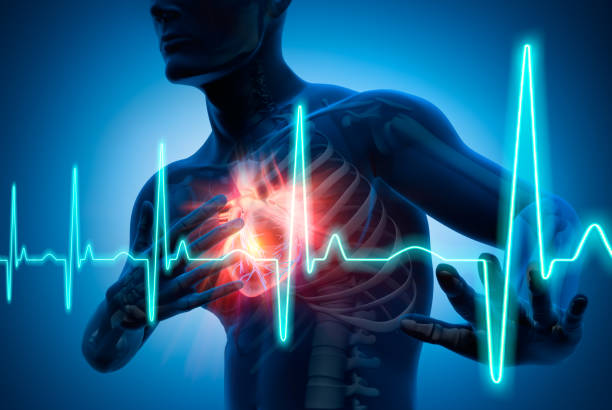

#**Heart Failure Predicton**

##Dataset Adress

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearning/Data/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##Column Description

*   Age: age of the patient [years]
*   Sex: sex of the patient [M: Male, F: Female]
*   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina NAP: Non-Anginal Pain, ASY: Asymptomatic]
*   RestingBP: resting blood pressure [mm Hg]
*   Cholesterol: serum cholesterol [mm/dl]
*   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
*   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having   ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
*   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
*   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
*   Oldpeak: oldpeak = ST [Numeric value measured in depression]
*   ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
*   HeartDisease: output class [1: heart disease, 0: Normal]




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.shape

(918, 12)

In [ ]:
columns = df.columns
columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


1    508
0    410
Name: HeartDisease, dtype: int64

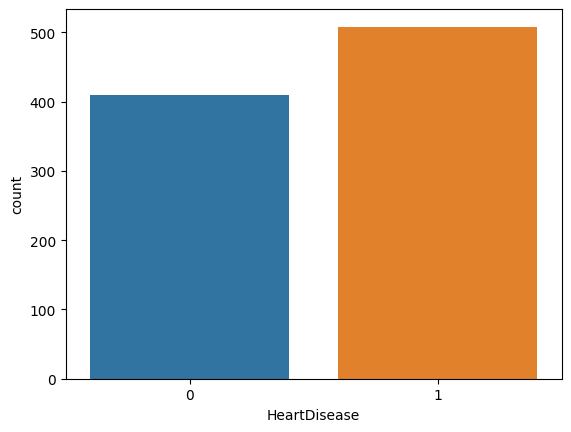

In [ ]:
sns.countplot(x = "HeartDisease", data = df)
df.loc[:, 'HeartDisease'].value_counts()

In [ ]:
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()
# ---------------------------------------------------------
final_numeric_feature = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS','MaxHR', 'Oldpeak']

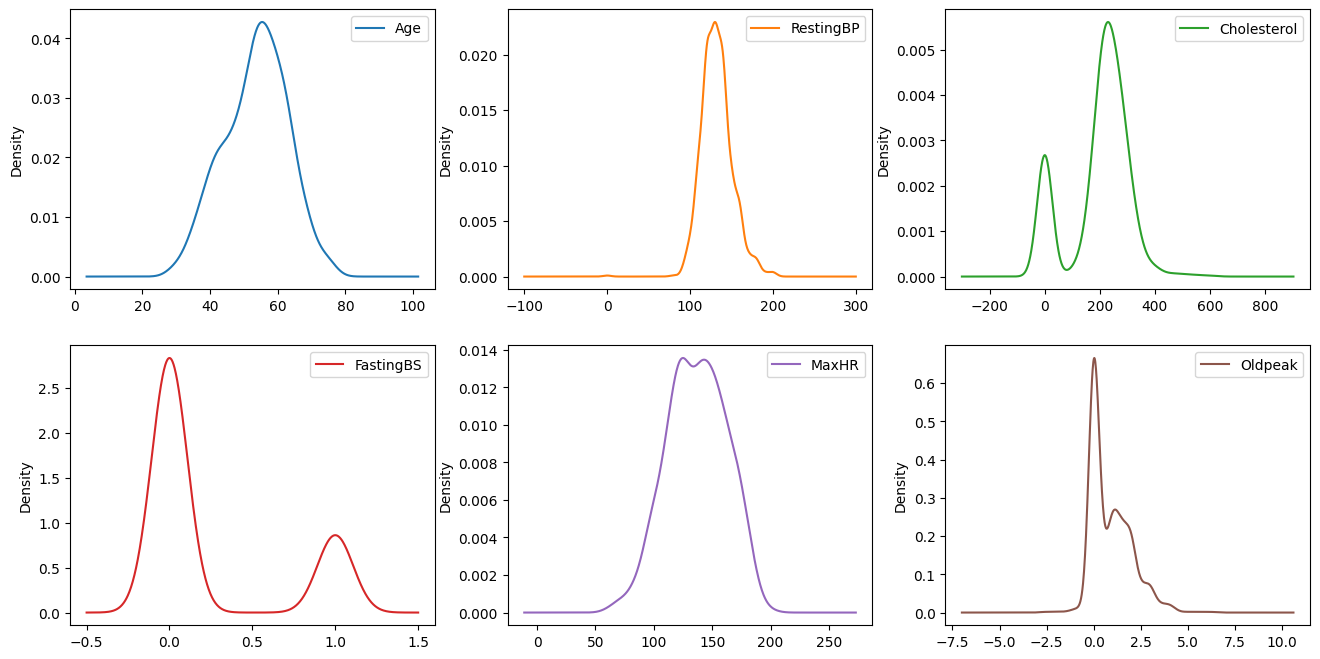

In [ ]:
df[final_numeric_feature].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()

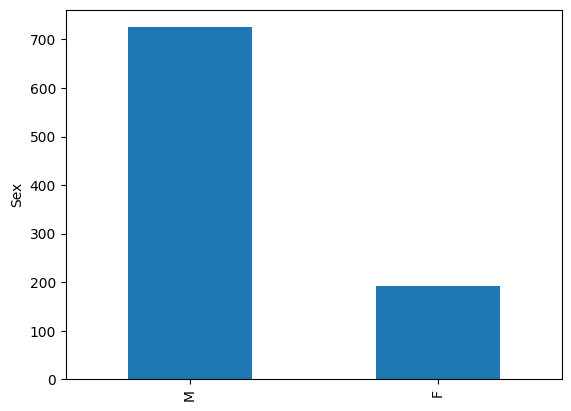

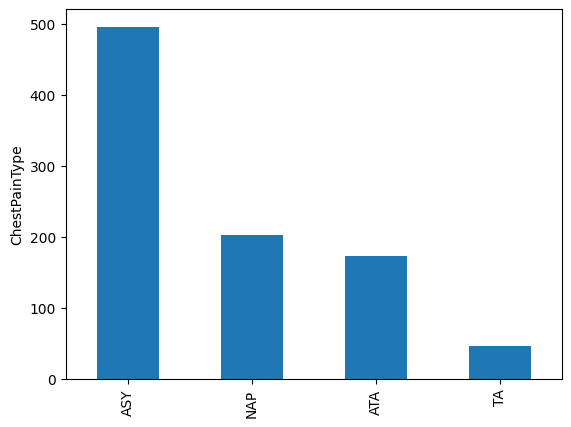

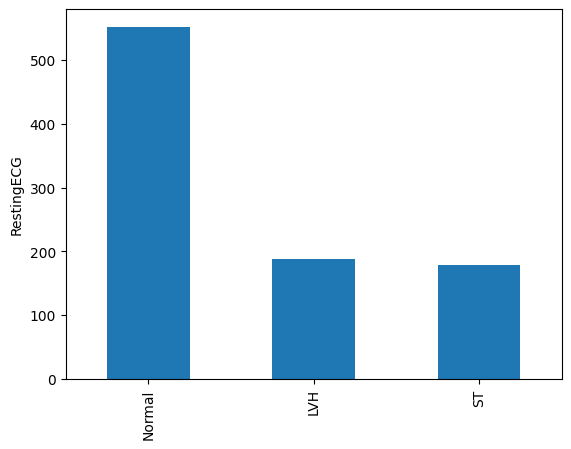

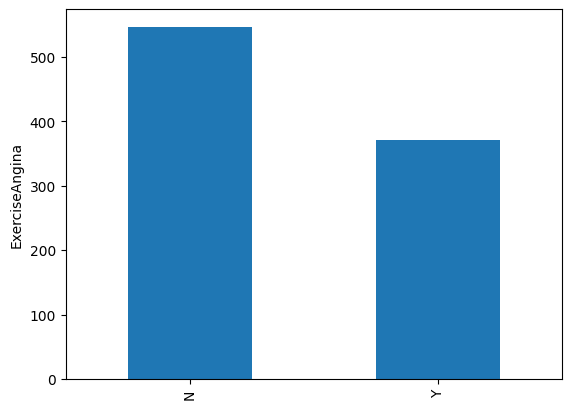

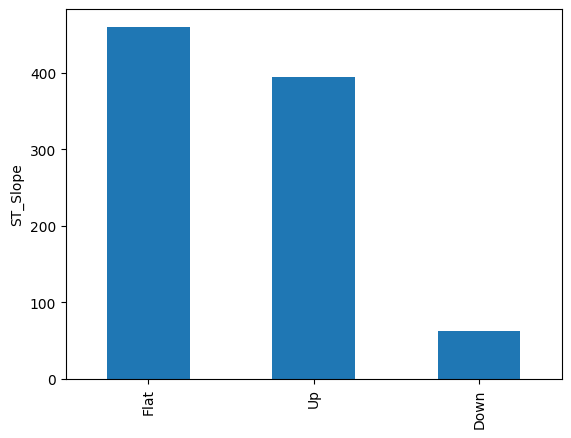

In [ ]:
for i in range(len(final_categorical_feature)):
    df[final_categorical_feature[i]].value_counts().plot(kind='bar')
    plt.xticks(rotation='vertical')
    plt.ylabel(final_categorical_feature[i])
    plt.show()

In [ ]:
df_categoric=df.select_dtypes(include=["object"]).copy()

In [ ]:
df_categoric

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [ ]:
df_columns=df_categoric.columns

In [ ]:
df_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in df_columns:
  lbe=LabelEncoder()
  df[i]=lbe.fit_transform(df[i])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


##Machine Learning

1.   Logistic Regression
2.   SVM
3.   KNN
4.   Decision Tree

In [26]:
y=df["HeartDisease"]
X=df.drop(["HeartDisease"],axis=1)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

##Logistic Regression

In [28]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
log_score=accuracy_score(y_test,y_pred)
print("model accuracy:", log_score)

model accuracy: 0.8695652173913043


Text(0.5, 1.0, 'Model Accuracy:0.8695652173913043')

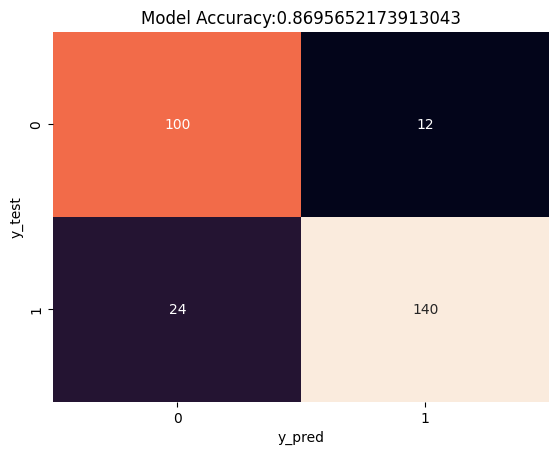

In [29]:
confusionmatrix_log=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix_log, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(log_score))

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.92      0.85      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



##SVM

model accuracy: SVC()
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       112
           1       0.79      0.73      0.76       164

    accuracy                           0.72       276
   macro avg       0.72      0.72      0.72       276
weighted avg       0.73      0.72      0.73       276



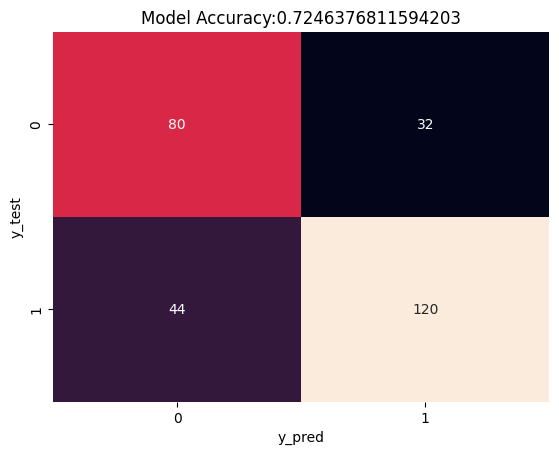

In [31]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
SVM_score=accuracy_score(y_test,y_pred)
print("model accuracy:", svm_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(SVM_score))
print(classification_report(y_test, y_pred))

##KNN

model accuracy: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       112
           1       0.77      0.74      0.76       164

    accuracy                           0.71       276
   macro avg       0.70      0.71      0.71       276
weighted avg       0.72      0.71      0.71       276



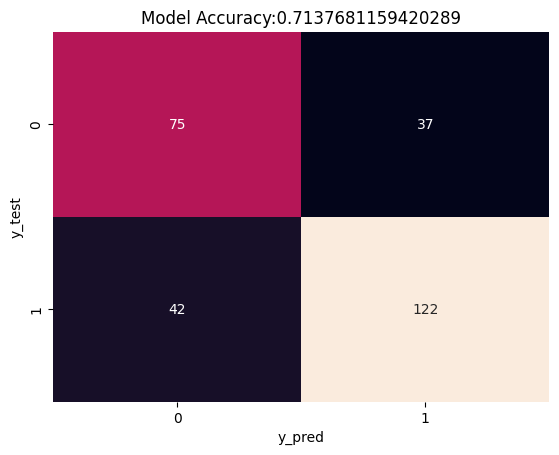

In [32]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
knn_score=accuracy_score(y_test,y_pred)
print("model accuracy:", knn_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(knn_score))
print(classification_report(y_test, y_pred))

##Decision Tree

model accuracy: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       112
           1       0.84      0.70      0.76       164

    accuracy                           0.74       276
   macro avg       0.74      0.75      0.74       276
weighted avg       0.76      0.74      0.75       276



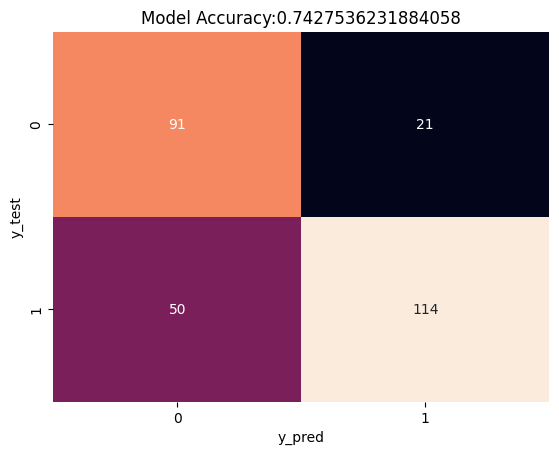

In [33]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)
tree_score=accuracy_score(y_test,y_pred)
print("model accuracy:", tree_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(tree_score))
print(classification_report(y_test, y_pred))

When we compare with this ML models, Logistic Regression model is by far the best.